# GD with Momentum
x^2 + 10sin(x)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def grad(x):
    return 2*x + 10*np.cos(x)

def cost(x):
    return x**2 + 10*np.sin(x)

def GD_momentum(theta_init, eta, gamma):
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(1000):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new))/np.array(theta_init).size < 1e-3:
            break
        theta.append(theta_new)
        v_old = v_new
    return theta, it

def draw(w, ids, nrows=2, ncols=4):
    height=4*nrows
    width=3.5*ncols

    x0 = np.linspace(start = -5.5, stop = 5.5, num = 100)
    y0 = cost(x0)

    fig,axs=plt.subplots(nrows, ncols, figsize = (width, height))
    for i, k in enumerate(ids):
        r = i//ncols
        c = i%ncols

        x = w[k]
        y = cost(x)

        str0 = 'iter {}/{}, x = {:.2f}, y = {:.2f}, grad = {:.3f}'.format(k, len(w)-1, x, y, grad(x))
        if nrows > 1:
            axs[r, c].plot(x0, y0, 'm')
            axs[r, c].set_xlabel(str0, fontsize=8)
            axs[r, c].plot(x, y, 'bo')
            axs[r, c].set_xticks([-5.5, 0, 5.5])
        else:
            axs[c].plot(x0, y0, 'm')
            axs[c].set_xlabel(str0, fontsize=8)
            axs[c].plot(x, y, 'bo')
            axs[c].set_xticks([-5.5, 0, 5.5])
    plt.show()

In [25]:
theta1, it1 = GD_momentum(5.5, 0.1, 0.9)
it1

138

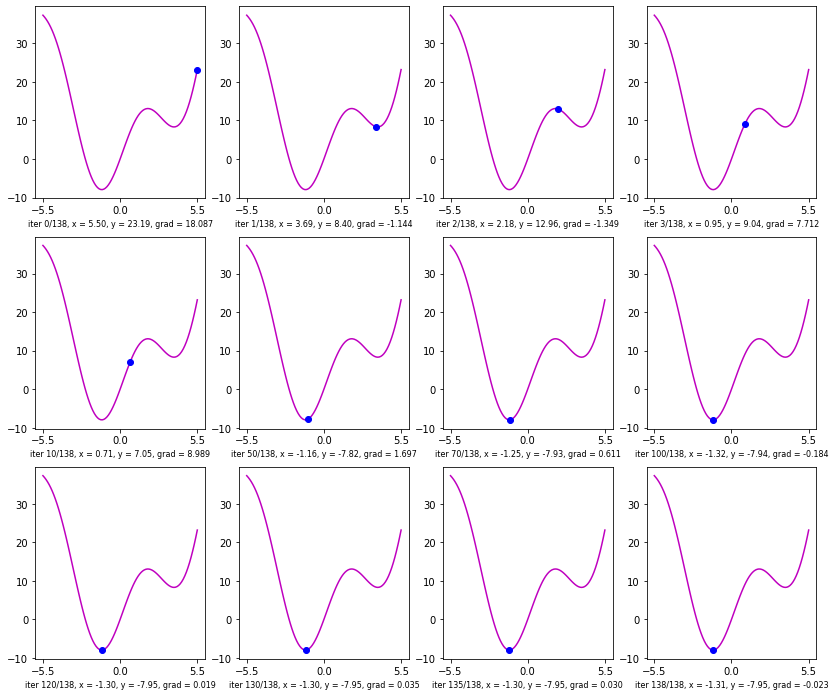

In [28]:
ids = [0, 1, 2, 3, 10, 50, 70, 100, 120, 130, 135, 138]
draw(theta1, ids, 3, 4)

# GD with NAG

In [31]:
def GD_NAG(theta_init, eta, gamma):
    theta = [theta_init]
    v =[np.zeros_like(theta_init)]
    for it in range(1000):
        v_new = gamma*v[-1] + eta*grad(theta[-1] - gamma*v[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new))/np.array(theta_init).size < 1e-3:
            break
        v.append(v_new)
        theta.append(theta_new)
    return theta, it

In [33]:
theta2, it2 = GD_NAG(5.5, 0.1, 0.9)
it2

16

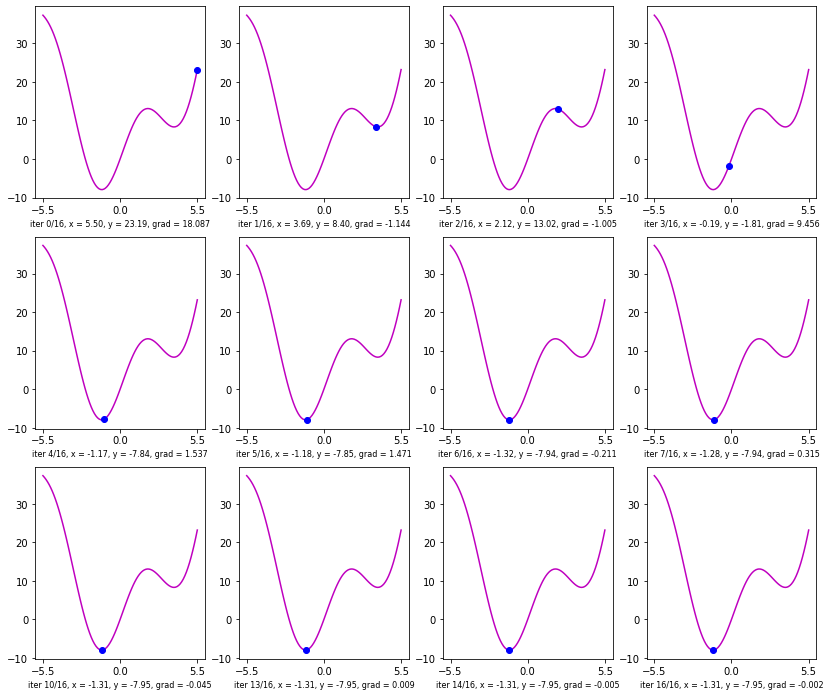

In [34]:
ids = [0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 14 ,16]
draw(theta2, ids, 3, 4)